## Antismash BLAST Annotations 

Date: 10/10/2019

In [1]:
import pandas as pd
from Bio import SeqIO
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('clusterblast/proteins.fasta', 'r') as handle:
    protein_records = list(SeqIO.parse(handle, 'fasta'))

In [3]:
# Look at first record to see how to structure data
print(protein_records[0])
print('ID string:', protein_records[0].id)

ID: NC_000914|c6|43584-44552|-|NGR_a00360|LysR_family_transcriptional_regulator|NP_443771.1
Name: NC_000914|c6|43584-44552|-|NGR_a00360|LysR_family_transcriptional_regulator|NP_443771.1
Description: NC_000914|c6|43584-44552|-|NGR_a00360|LysR_family_transcriptional_regulator|NP_443771.1
Number of features: 0
Seq('MRFKGLDLNLLVALDALMTERKLTAAARSINLSQPAMSAAITRLRTYFRDELFT...RHP', SingleLetterAlphabet())
ID string: NC_000914|c6|43584-44552|-|NGR_a00360|LysR_family_transcriptional_regulator|NP_443771.1


In [4]:
protein_df = [(rec.id.split('|')[-1], rec.id.split('|')[-2], '_'.join(rec.id.split('|')[:2]), str(rec.seq)) for rec in protein_records]
protein_df = pd.DataFrame(protein_df, columns=['ncbi_id', 'function', 'chromosome', 'sequence'])

In [5]:
# Looks much better!
protein_df.head()

,ncbi_id,function,chromosome,sequence
0,NP_443771.1,LysR_family_transcriptional_regulator,NC_000914_c6,MRFKGLDLNLLVALDALMTERKLTAAARSINLSQPAMSAAITRLRT...
1,NP_443770.1,hypothetical_protein,NC_000914_c6,MLVARLLRWALTVSLRLDPYGRKDEMAGAVGRFATKPVLQEAHARG...
2,NP_443769.1,mannose-1-phosphate_guanylyltransferase,NC_000914_c6,MNSHPLMRLLRSRHTVMKLPSNAIKNDTMLPKIIPAIMAGGRGTRL...
3,NP_443768.1,phosphomanomutase,NC_000914_c6,MGPKFGTSGLRGLATELVGSVSALYATAFSRMLLDRGRVAPGATVL...
4,NP_443767.1,chitin_oligosaccharide_fucosyltransferase,NC_000914_c6,MYNRYVLSRRRTGFGDCLWSLAAAWRYAQRTARTLAVDWRGSCYLD...


## Protein Level EDA

Questions: 

1. How many unique sequences are there? Does this equal the number of unique NCBI ID's?
2. How many unique BLAST annotations are there? How many involve transport?

In [6]:
unique_seqs = protein_df['sequence'].unique()
unique_ncbi = protein_df['ncbi_id'].unique()

In [7]:
print(f'There are {protein_df.shape[0]} total sequences and {len(unique_seqs)} unique sequences')
print(f'There are {len(unique_ncbi)} unique NCBI ids. {len(unique_ncbi) - len(unique_seqs)} NCBI ids collide??')

There are 3856197 total sequences and 2816134 unique sequences
There are 2847804 unique NCBI ids. 31670 NCBI ids collide??


In [8]:
unique_function = protein_df['function'].unique()
transport_function = [f for f in unique_function if 'transport' in f]

In [9]:
print(f'There are {len(unique_function)} unique BLAST annotations.')
print(f'Of those, {len(transport_function)} are transport-affiliated.')

There are 26848 unique BLAST annotations.
Of those, 1973 are transport-affiliated.


Next set of questions. What is the distribution of transport-affiliated proteins? Specifically

1. What are the twenty most common transporter types?
2. What is the count distribution for transporter types? 
3. What is the length distribution of transport vs non transport?
4. What is the length distribution for each of the twenty most common types of transporters?

In [10]:
# First, let's grab lengths.
protein_df['length'] = protein_df['sequence'].map(lambda x: len(x))

# Now let's create an "is_transporter" variable
protein_df['transporter'] = protein_df['function'].map(lambda x: 'transport' in x)

In [11]:
protein_df.head()

,ncbi_id,function,chromosome,sequence,length,transporter
0,NP_443771.1,LysR_family_transcriptional_regulator,NC_000914_c6,MRFKGLDLNLLVALDALMTERKLTAAARSINLSQPAMSAAITRLRT...,322,False
1,NP_443770.1,hypothetical_protein,NC_000914_c6,MLVARLLRWALTVSLRLDPYGRKDEMAGAVGRFATKPVLQEAHARG...,50,False
2,NP_443769.1,mannose-1-phosphate_guanylyltransferase,NC_000914_c6,MNSHPLMRLLRSRHTVMKLPSNAIKNDTMLPKIIPAIMAGGRGTRL...,512,False
3,NP_443768.1,phosphomanomutase,NC_000914_c6,MGPKFGTSGLRGLATELVGSVSALYATAFSRMLLDRGRVAPGATVL...,474,False
4,NP_443767.1,chitin_oligosaccharide_fucosyltransferase,NC_000914_c6,MYNRYVLSRRRTGFGDCLWSLAAAWRYAQRTARTLAVDWRGSCYLD...,322,False


In [12]:
# Filter out for transporters
transporter_df = protein_df[protein_df['transporter'] == True].reset_index(drop=True)

### Overall Length Distribution

First off, are transporters significantly different in length from non-transporters, overall?

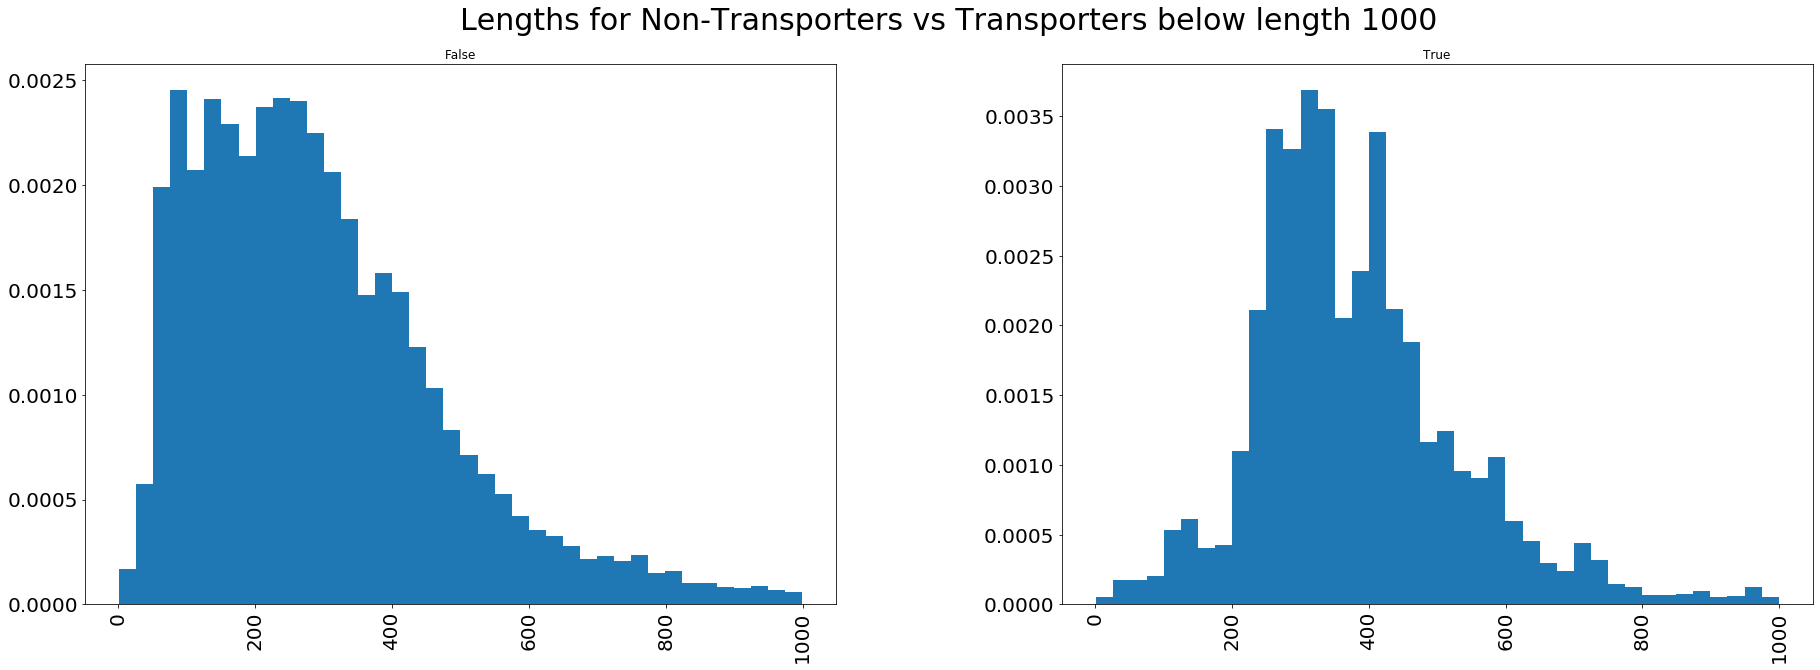

In [13]:
cutoff = 1000
protein_df[protein_df['length'] < cutoff].hist(column='length', 
                                               by='transporter', 
                                               bins=40, 
                                               density=True, 
                                               sharex=True, 
                                               figsize=(30, 10),
                                               xlabelsize=20,
                                               ylabelsize=20)
plt.suptitle(f'Lengths for Non-Transporters vs Transporters below length {cutoff}', size=30)
plt.show()

### Close Look at Top Twenty Transporter Types

Here are the twenty most common transporters and the length distributions for them.

In [14]:
sorted_transporter_counts = transporter_df['function'].value_counts()
top_twenty_counts = sorted_transporter_counts[:20]
print('Top twenty most common transporter proteins')
print(top_twenty_counts)

Top twenty most common transporter proteins
MFS_transporter                                               53851
ABC_transporter_ATP-binding_protein                           48723
ABC_transporter_permease                                      30003
ABC_transporter_substrate-binding_protein                     11925
iron_ABC_transporter_permease                                  7083
ABC_transporter                                                6201
efflux_RND_transporter_periplasmic_adaptor_subunit             4158
sugar_ABC_transporter_permease                                 4134
nuclear_transport_factor_2_family_protein                      4053
carbohydrate_ABC_transporter_permease                          3267
sugar_ABC_transporter_substrate-binding_protein                3253
amino_acid_ABC_transporter_permease                            3197
EamA/RhaT_family_transporter                                   3098
sugar_ABC_transporter_ATP-binding_protein                      3009
cycl

In [15]:
top_twenty_df = transporter_df[transporter_df['function'].isin(top_twenty_counts.index)].reset_index(drop=True)

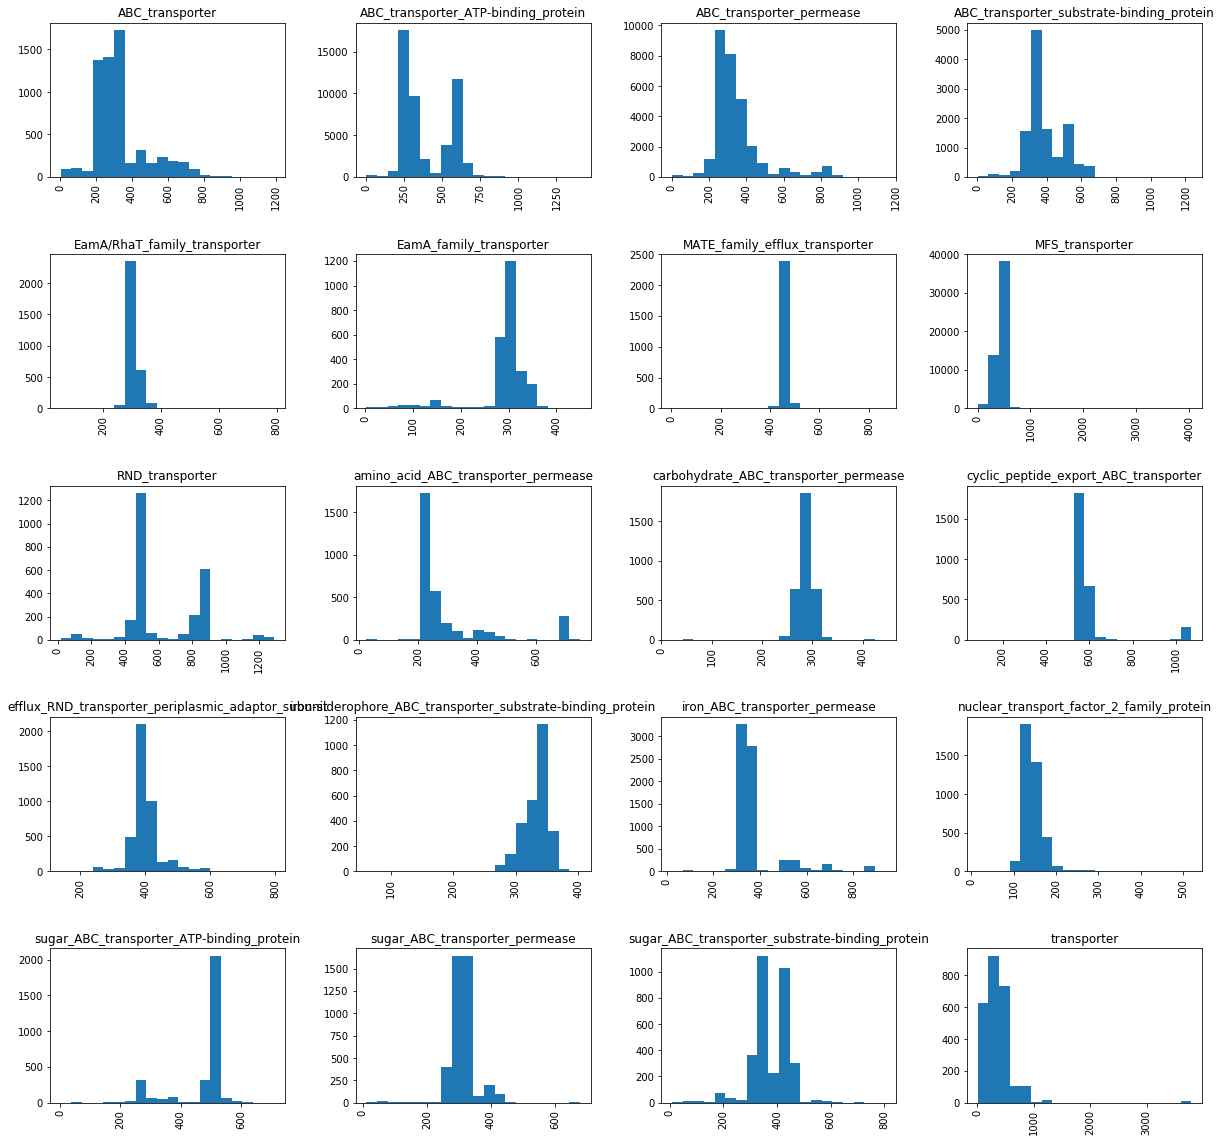

In [16]:
top_twenty_df.hist(column='length', by='function', figsize=(20,20), bins=20)
plt.show()

### Looking at the Rest of the Transporters

Besides the top k (which have a lot of the counts), what is the distribution of counts for the rest?

__This cutoff is easy to modify and play with!__


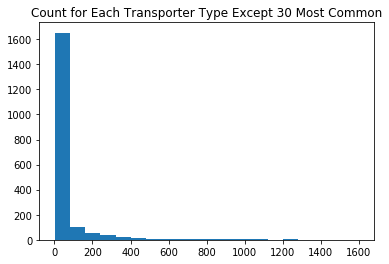

In [17]:
# Subset out the top "cutoff" transporter types
cutoff = 30
idx = ~transporter_df['function'].isin(sorted_transporter_counts.index[:cutoff])
filtered_transporter_df = transporter_df[idx].reset_index(drop=True)

# Now get the counts of remaining functions and plot histogram
plt.hist(filtered_transporter_df['function'].value_counts(), bins=20)
plt.title(f'Count for Each Transporter Type Except {cutoff} Most Common')
plt.show()

## Cluster Level EDA

Now let's perform a similar analysis at the cluster level. Namely,

1. How many clusters have transporters vs don't? 
2. What are the cluster types that most often occur with transporters? 
3. For cluster types that occur often with transporters, how many transporters are there per cluster?
4. How does number of transporter compare to total number of ORFs for such clusters?

In [61]:
with open('clusterblast/clusters.txt', 'r') as handle:
    cluster_df = pd.read_csv(handle, sep='\t', names=['chromosome', 'annotation', 'cluster_num', 'compound', 'weird', 'ncbi'])

# Create unique key cluster_id
cluster_df['cluster_id'] = cluster_df.apply(lambda x: '_'.join([x['chromosome'], x['cluster_num']]), axis=1)

# Create num_orfs value
cluster_df['num_orfs'] = cluster_df['ncbi'].map(lambda x: len(x.split(';')))

In [62]:
ncbi_transport_dict = dict(zip(protein_df.ncbi_id, protein_df.transporter))

In [63]:
# Create num_transporters using lookup against protein_df
def count_transporters(orfs: str) -> int:
    all_orfs = orfs.split(';')
    is_transporter = [ncbi_transport_dict[orf] for orf in all_orfs]
    return np.sum(is_transporter)

cluster_df['num_transporters'] = cluster_df['ncbi'].map(count_transporters)

Here's the final dataset:

In [65]:
cluster_df = cluster_df.reindex(columns=['cluster_id', 'compound', 'num_orfs', 'num_transporters', 'annotation', 'ncbi', 'chromosome', 'cluster_num', 'weird'])
cluster_df.head()

,cluster_id,compound,num_orfs,num_transporters,annotation,ncbi,chromosome,cluster_num,weird
0,NC_000914_c6,terpene,15,0,"Sinorhizobium fredii NGR234 plasmid pNGR234a, ...",NP_443771.1;NP_443770.1;NP_443769.1;NP_443768....,NC_000914,c6,NGR_a00360;NGR_a00370;NGR_a00380;NGR_a00390;NG...
1,NC_000914_c7,siderophore,9,1,"Sinorhizobium fredii NGR234 plasmid pNGR234a, ...",NP_444154.1;NP_444153.1;NP_444152.1;NP_444151....,NC_000914,c7,NGR_a00710;NGR_a00720;NGR_a00730;NGR_a00740;NG...
2,NC_000914_c8,proteusin,15,1,"Sinorhizobium fredii NGR234 plasmid pNGR234a, ...",NP_444136.1;NP_444135.1;NP_444134.1;NP_444133....,NC_000914,c8,NGR_a00890;NGR_a00900;NGR_a00910;NGR_a00920;NG...
3,NC_000914_c9,hserlactone,13,0,"Sinorhizobium fredii NGR234 plasmid pNGR234a, ...",NP_443816.1;NP_443815.1;NP_443814.1;NP_443813....,NC_000914,c9,NGR_a04100;NGR_a04110;NGR_a04120;NGR_a04130;NG...
4,NC_000918_c1,other,37,0,"Aquifex aeolicus VF5 chromosome, complete genome",NP_213663.1;NP_213664.1;NP_213665.1;NP_213666....,NC_000918,c1,aq_970;aq_972;aq_973;aq_974;aq_975;aq_977;aq_9...


### Individual Cluster Analysis

Let's start by seeing how many BGCs have zero transporters. 

In [57]:
num_no_transporters = np.sum(cluster_df['num_transporters'] == 0)
print(f'There are {cluster_df.shape[0]} total BGCs. {num_no_transporters} have no transporters.')

There are 152105 total BGCs. 47819 have no transporters.


Now let's see which individual clusters have the most transporters to start

In [55]:
df = cluster_df.iloc[:, :3]
idx = df['num_transporters'].sort_values(ascending=False).index
df = df.iloc[idx].reset_index(drop=True)

k = 20
print(f'Top {k} clusters with most transporters')
df.head(k)

Top 20 clusters with most transporters


,cluster_id,num_orfs,num_transporters
0,NZ_CP014127_c5,444,85
1,NZ_CP015362_c5,165,29
2,NZ_ASXP01000005_c6,60,24
3,NZ_LT855380_c3,80,24
4,NZ_CP009313_c15,103,23
5,NZ_CP023667_c1,68,21
6,NZ_KE691950_c3,75,21
7,NZ_CM002271_c24,127,21
8,NZ_CM002273_c25,126,21
9,NZ_CP007039_c4,83,21


Now let's see the breakdown of number of transporters vs compound type. To start, what how many compound types does antismash record and how common are they?

In [81]:
unique_compound = cluster_df['compound'].unique()
print(f'There are {len(unique_compound)} unique product types.')
compound_counts = cluster_df['compound'].value_counts()


k = 20
print(f'The top {k} most common are:')
compound_counts[:k]

There are 847 unique product types.
The top 20 most common are:


nrps             28192
bacteriocin      20597
terpene          19203
other            10843
t1pks             8003
siderophore       7011
arylpolyene       6479
hserlactone       5555
t1pks-nrps        5065
t3pks             4226
lantipeptide      4196
thiopeptide       3836
ectoine           3613
lassopeptide      1916
butyrolactone     1524
sactipeptide      1481
phosphonate       1288
t2pks             1124
otherks            905
phenazine          782
Name: compound, dtype: int64

Now for these top few, let's see what the distribution of number of transporters is within them.

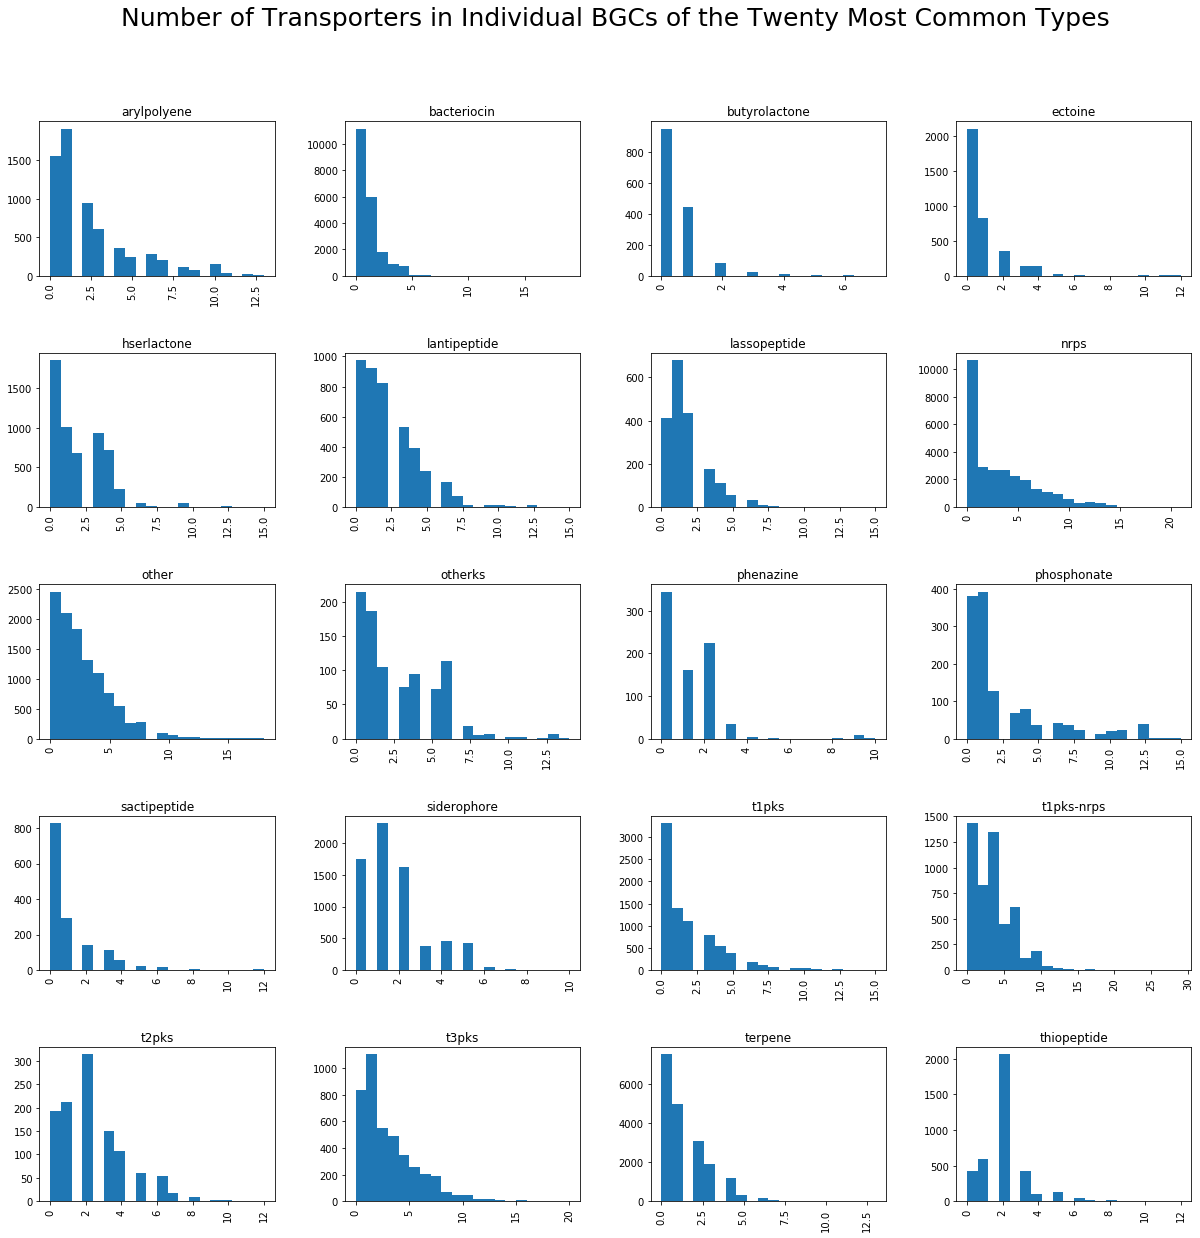

In [90]:
df = cluster_df[cluster_df['compound'].isin(compound_counts[:20].index)]
df.hist(column='num_transporters', by='compound', figsize=(20,20), bins=20)
plt.suptitle('Number of Transporters in Individual BGCs of the Twenty Most Common Types', size=25)
plt.show()